In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Extracting data from downloaded files

In [46]:
from src.data_wrangling import *
import matplotlib.pyplot as plt

In [47]:
data_dir = 'CLA Datasets'
save_as = 'dataset_CLA_nonaugmented.pkl'

create_dataset(data_dir,save_as)

Reading CLA Datasets\CLA-SubjectJ-170504-3St-LRHand-Inter.mat

Reading CLA Datasets\CLA-SubjectJ-170508-3St-LRHand-Inter.mat

Error Reading CLA Datasets\CLA-SubjectJ-170508-3St-LRHand-Inter.mat

Reading CLA Datasets\CLA-SubjectJ-170510-3St-LRHand-Inter.mat

Error Reading CLA Datasets\CLA-SubjectJ-170510-3St-LRHand-Inter.mat

Reading CLA Datasets\CLASubjectA1601083StLRHand.mat

Reading CLA Datasets\CLASubjectB1510193StLRHand.mat

Reading CLA Datasets\CLASubjectB1510203StLRHand.mat

Reading CLA Datasets\CLASubjectB1512153StLRHand.mat

Reading CLA Datasets\CLASubjectC1511263StLRHand.mat

Reading CLA Datasets\CLASubjectC1512163StLRHand.mat

Reading CLA Datasets\CLASubjectC1512233StLRHand.mat

Reading CLA Datasets\CLASubjectD1511253StLRHand.mat

Reading CLA Datasets\CLASubjectE1512253StLRHand.mat

Reading CLA Datasets\CLASubjectE1601193StLRHand.mat

Reading CLA Datasets\CLASubjectE1601223StLRHand.mat

Reading CLA Datasets\CLASubjectF1509163StLRHand.mat

Reading CLA Datasets\CLASubjectF15091

### Technical Validation

Plotting left and right hand motor imagery for one of the subjects shown in the study and making sure that ERP curve has same form. Instructions for how these plots were generated on page 9 of Kaya et al. 

Only testing one one, getting from signal onset to 1.5 seconds after.

In [2]:
from src.data_wrangling import *
from src.dataset_wrappers import *
from src.preprocessing import *

In [3]:
#SubjectE-151225
trials_val,labels_val = technical_validation_dataset = load_dataset('Technical Validation Data.pkl')

In [4]:
marker_dict = {
    1:'left',
    2:'right'
}

#Organizing the whole list of signals into left and right into each entry of the dictionary, and then also a seperate dict for ERP curve we plot after
group_dict,averaged_group_dict = organize_into_groups(marker_dict,trials_val,labels_val,average_signals=True)

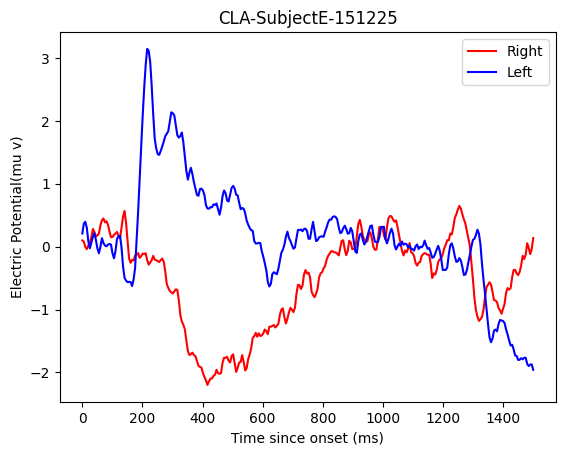

In [5]:
subject_name = 'CLA-SubjectE-151225'

t = np.linspace(start=0,stop=1500,num=300)
plt.plot(t,averaged_group_dict['right'][0],color='red')
plt.plot(t,averaged_group_dict['left'][0],color='blue')

plt.xlabel('Time since onset (ms)')
plt.ylabel('Electric Potential(mu v)')

plt.legend(['Right','Left'])

plt.title(subject_name);

Done from signal onset to 1.5 seconds after. Range is +/- 3 microvolts for channel C3, as mentioned by study. Can compare the above figure with the figure on page 9 for mentiond subject directly. 

General form matches for the above subject. Data parsing seems to have been done correctly. 

### Power Spectrum for above ERP Curve

In [6]:
from scipy.signal import periodogram

In [7]:
#Just doing C3 for technical validation to compare with Kaya et. al
psd_right = periodogram(averaged_group_dict['right'][0],fs=200)
psd_left = periodogram(averaged_group_dict['left'][0],fs=200)

In [8]:
data_indices = psd_right[0]

mu_start = np.argmax(data_indices >= 8)
mu_end = np.argmax(data_indices >= 13)

relevant_indices = data_indices[mu_start:mu_end]

relevant_data_right = psd_right[1][mu_start:mu_end]
relevant_data_left = psd_left[1][mu_start:mu_end]

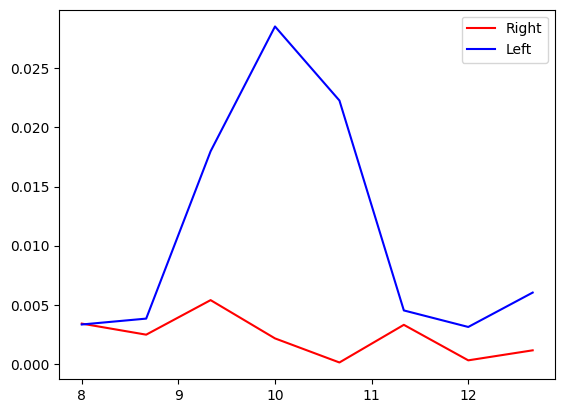

In [9]:
plt.plot(relevant_indices,relevant_data_right,color='red');
plt.plot(relevant_indices,relevant_data_left,color='blue');

plt.legend(['Right','Left']);

### Auto-Encoder Pre-Training

In [4]:
from src.models.CAE import ConvolutionalAutoEncoder
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import numpy as np

from src.dataset_wrappers import *
from sklearn.decomposition import PCA

In [3]:
dataset_path = 'dataset_CLA_nonaugmented.pkl'
training_settings_json = 'TRAINING_SETTINGS/auto_encoder_pre_training/test.json'

Creating directory Experiments/Simplest Model Again

Training steps per epoch: ~55



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.9508915543556213
Training loss: 0.9500877261161804



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.7166178226470947
Training loss: 0.7122980356216431



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.6467869281768799
Training loss: 0.6407507658004761



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.5806411504745483
Training loss: 0.5738041400909424



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.5387710332870483
Training loss: 0.5312107801437378



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.5095722675323486
Training loss: 0.5026515126228333



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.48951029777526855
Training loss: 0.4828460216522217



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.47407346963882446
Training loss: 0.46753954887390137



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.46063753962516785
Training loss: 0.45417550206184387



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.4451967477798462
Training loss: 0.43936142325401306



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.430562287569046
Training loss: 0.4252963066101074



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.41690751910209656
Training loss: 0.41173359751701355



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.40730878710746765
Training loss: 0.4022834897041321



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.39923030138015747
Training loss: 0.3934987485408783



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3920774757862091
Training loss: 0.38608378171920776



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3865524232387543
Training loss: 0.3801051378250122



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3801817297935486
Training loss: 0.37407222390174866



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3744209110736847
Training loss: 0.3674352765083313



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.37021514773368835
Training loss: 0.3631598651409149



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.366232305765152
Training loss: 0.35886865854263306



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3627301752567291
Training loss: 0.3550184667110443



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3591006398200989
Training loss: 0.35229721665382385



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3550597131252289
Training loss: 0.3478342294692993



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.35262513160705566
Training loss: 0.3451422452926636



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.34923505783081055
Training loss: 0.3419604003429413



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.34641018509864807
Training loss: 0.3386934995651245



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3437128961086273
Training loss: 0.33619511127471924



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3414646089076996
Training loss: 0.333768755197525



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3411448001861572
Training loss: 0.33275502920150757



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3369078040122986
Training loss: 0.3294176757335663



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3359411656856537
Training loss: 0.3286110460758209



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3330139219760895
Training loss: 0.32529759407043457



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3315836489200592
Training loss: 0.3233723044395447



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.32952237129211426
Training loss: 0.32137906551361084



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.32915550470352173
Training loss: 0.320512980222702



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.32554104924201965
Training loss: 0.31735289096832275



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3236621916294098
Training loss: 0.31531310081481934



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.321509450674057
Training loss: 0.3132966160774231



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3194042146205902
Training loss: 0.31173327565193176



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3167515993118286
Training loss: 0.3087998628616333



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3144606649875641
Training loss: 0.3061188757419586



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.311305433511734
Training loss: 0.30358684062957764



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.30774009227752686
Training loss: 0.30036497116088867



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3040628135204315
Training loss: 0.2961559295654297



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3018587529659271
Training loss: 0.2954023480415344



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2977050542831421
Training loss: 0.2895198166370392



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2922435402870178
Training loss: 0.2852518856525421



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2877599000930786
Training loss: 0.2810708284378052



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.28526756167411804
Training loss: 0.2784334421157837



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2808853089809418
Training loss: 0.2741701900959015



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.27771446108818054
Training loss: 0.27139392495155334



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2743081748485565
Training loss: 0.268581748008728



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.27164918184280396
Training loss: 0.26561644673347473



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2686954736709595
Training loss: 0.2631981372833252



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2663533091545105
Training loss: 0.2610839605331421



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2640015184879303
Training loss: 0.2588653266429901



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.26216283440589905
Training loss: 0.2569277882575989



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2602502107620239
Training loss: 0.2550075650215149



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.25870445370674133
Training loss: 0.254308819770813



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.25867435336112976
Training loss: 0.2527041435241699



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.25591200590133667
Training loss: 0.2506640553474426



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2530054748058319
Training loss: 0.24790801107883453



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2510761618614197
Training loss: 0.24637684226036072



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2495587319135666
Training loss: 0.24449484050273895



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.24747835099697113
Training loss: 0.2427576780319214



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.24671755731105804
Training loss: 0.2412911355495453



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.24421191215515137
Training loss: 0.23909643292427063



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2419930100440979
Training loss: 0.23726023733615875



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2404576689004898
Training loss: 0.2354011833667755



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23840683698654175
Training loss: 0.23349057137966156



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.236090287566185
Training loss: 0.231639564037323



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2347133457660675
Training loss: 0.22975757718086243



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2322278916835785
Training loss: 0.2277747392654419



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23034711182117462
Training loss: 0.22635217010974884



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22887182235717773
Training loss: 0.22478008270263672



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22814352810382843
Training loss: 0.22376398742198944



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22556205093860626
Training loss: 0.2220219075679779



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.224824920296669
Training loss: 0.22054502367973328



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22349463403224945
Training loss: 0.2194078117609024



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22242707014083862
Training loss: 0.21854734420776367



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2211892157793045
Training loss: 0.21740999817848206



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22100616991519928
Training loss: 0.216929093003273



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21909376978874207
Training loss: 0.21587032079696655



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21880443394184113
Training loss: 0.21492740511894226



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21865618228912354
Training loss: 0.21482017636299133



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21681363880634308
Training loss: 0.21355833113193512



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2160140872001648
Training loss: 0.21276487410068512



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2155434787273407
Training loss: 0.21308757364749908



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21474669873714447
Training loss: 0.21148012578487396



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21499937772750854
Training loss: 0.2114347517490387



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2130693644285202
Training loss: 0.2100500613451004



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2124694138765335
Training loss: 0.20943483710289001



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21250073611736298
Training loss: 0.20893673598766327



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2111615091562271
Training loss: 0.20842671394348145



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21097081899642944
Training loss: 0.20776231586933136



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.21005015075206757
Training loss: 0.20678162574768066



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20918864011764526
Training loss: 0.2060527801513672



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20897680521011353
Training loss: 0.20564132928848267



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20807786285877228
Training loss: 0.2051747888326645



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2075783908367157
Training loss: 0.20441555976867676



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20689885318279266
Training loss: 0.20382271707057953



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20615358650684357
Training loss: 0.20336578786373138



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20581106841564178
Training loss: 0.20277522504329681



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20485030114650726
Training loss: 0.20219062268733978



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2045886069536209
Training loss: 0.201615110039711



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20429207384586334
Training loss: 0.20132115483283997



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2032124102115631
Training loss: 0.20069128274917603



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2028753012418747
Training loss: 0.20029011368751526



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2027158886194229
Training loss: 0.20023129880428314



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20169690251350403
Training loss: 0.1991073042154312



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20146393775939941
Training loss: 0.19886064529418945



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2015557736158371
Training loss: 0.19898810982704163



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.20029553771018982
Training loss: 0.1981826275587082



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.1995953768491745
Training loss: 0.19726502895355225



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19929756224155426
Training loss: 0.1967814713716507



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19854778051376343
Training loss: 0.196258082985878



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19807502627372742
Training loss: 0.19578997790813446



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.1979265660047531
Training loss: 0.1956532746553421



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19704410433769226
Training loss: 0.19487638771533966



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19654947519302368
Training loss: 0.1946256160736084



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.1958906203508377
Training loss: 0.19419915974140167



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19551034271717072
Training loss: 0.19364799559116364



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.1954440325498581
Training loss: 0.19328278303146362



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19492465257644653
Training loss: 0.19374480843544006



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19453300535678864
Training loss: 0.19245372712612152



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19386988878250122
Training loss: 0.19193097949028015



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19337140023708344
Training loss: 0.19200918078422546



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19290359318256378
Training loss: 0.19127482175827026



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19265753030776978
Training loss: 0.191065713763237



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.192252516746521
Training loss: 0.19065497815608978



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19204087555408478
Training loss: 0.19043515622615814



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19156919419765472
Training loss: 0.18991024792194366



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19117169082164764
Training loss: 0.18964482843875885



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19100746512413025
Training loss: 0.18935877084732056



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19053351879119873
Training loss: 0.18904949724674225



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.19041332602500916
Training loss: 0.18874616920948029



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18970970809459686
Training loss: 0.1882326304912567



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18954390287399292
Training loss: 0.18863604962825775



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18917664885520935
Training loss: 0.18767637014389038



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18896569311618805
Training loss: 0.1873745322227478



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.1883401870727539
Training loss: 0.18733219802379608



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18804557621479034
Training loss: 0.18685674667358398



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.1881430745124817
Training loss: 0.18678522109985352



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18783298134803772
Training loss: 0.1864481419324875



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18726210296154022
Training loss: 0.18587669730186462



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18669718503952026
Training loss: 0.18541808426380157



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18622346222400665
Training loss: 0.18523405492305756



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.18585483729839325
Training loss: 0.1847490668296814



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.1855296790599823
Training loss: 0.18439768254756927



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.1853710412979126
Training loss: 0.18429777026176453

Adding test loss and test accuracy to training history...
Test loss is 0.2077430784702301


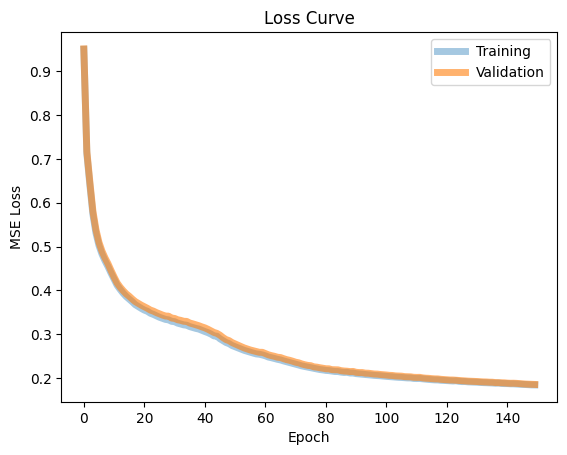

In [6]:
CAE = ConvolutionalAutoEncoder(dataset_path,training_settings_json)
CAE.build_encoder()
CAE.build_decoder()
CAE.build_auto_encoder()

optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError()

CAE.compile_auto_encoder(loss,optimizer)

experiment_dir = 'Experiments/Simplest Model'

CAE.train(save_experiment=True,experiment_dir = experiment_dir,model_name = 'auto_encoder.keras')

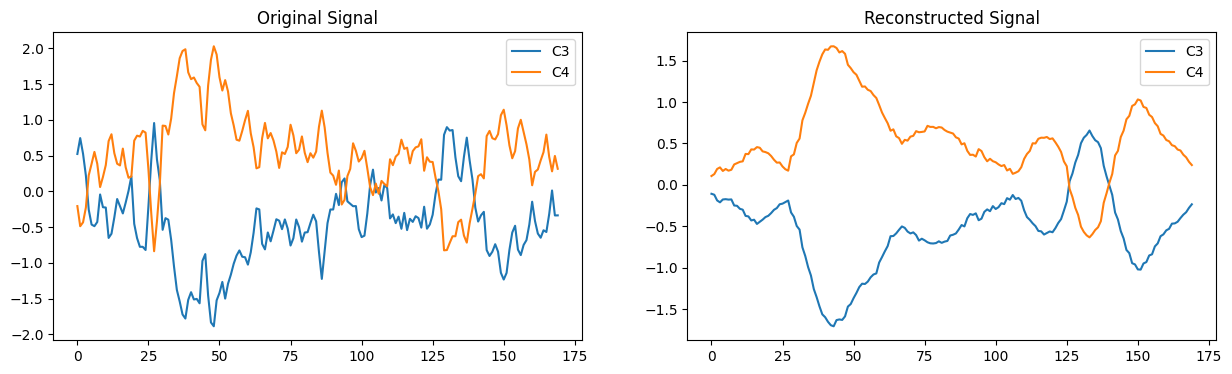

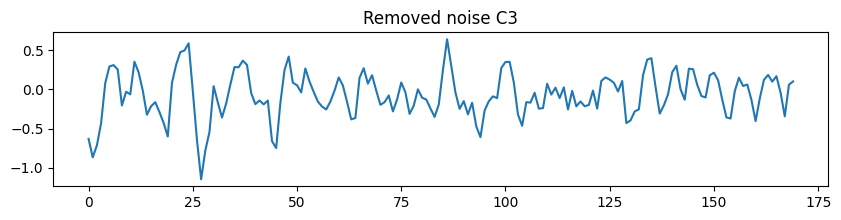

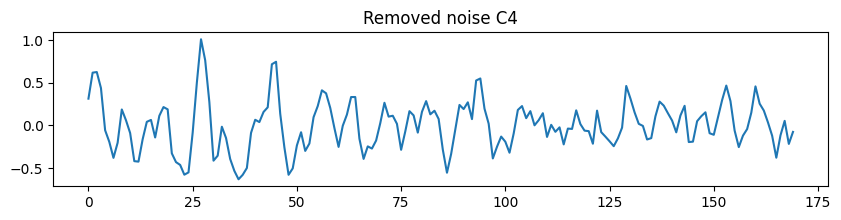

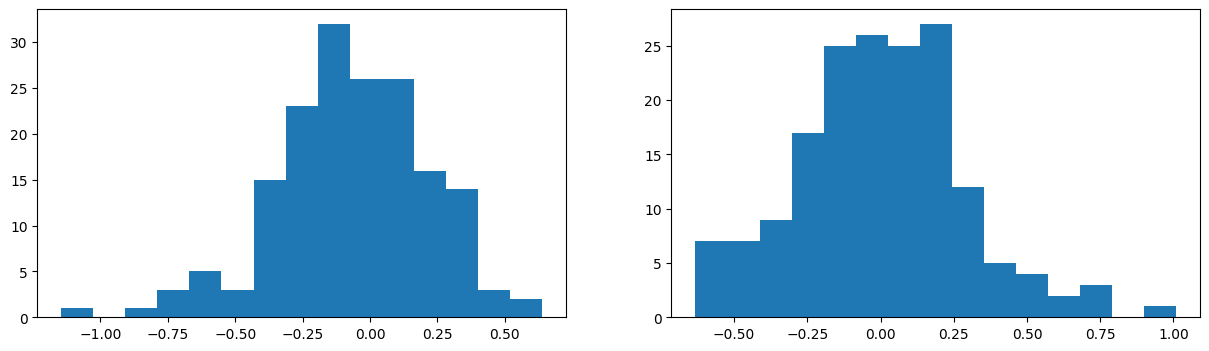

In [8]:
CAE.show_random_reconstruction()

In [9]:
embeddings = CAE.encoder(CAE.training_trials)

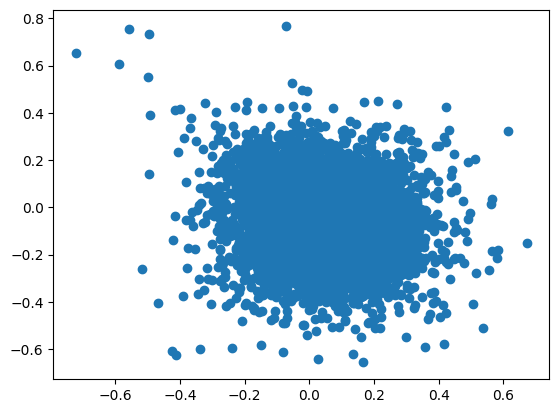

In [10]:
plt.scatter(embeddings[:,0],embeddings[:,3])

### DEC Training

In [5]:
from src.models.DEC import DeepEmbeddedClustering

In [6]:
DEC_TRAINING_SETTINGS_JSON = 'TRAINING_SETTINGS/dec_training/test.json'
experiment_dir = 'Experiments/Simplest Possible Model'

DEC = DeepEmbeddedClustering(dataset_path,DEC_TRAINING_SETTINGS_JSON,experiment_dir)

In [7]:
DEC.load_auto_encoder()
DEC.extract_encoder()

In [9]:
DEC.auto_encoder.summary()

Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 1, 78, 8)          264       
                                                                 
 reshape_215 (Reshape)       (None, 78, 8)             0         
                                                                 
 leaky_re_lu_86 (LeakyReLU)  (None, 78, 8)             0         
                                                                 
 conv1d_43 (Conv1D)          (None, 32, 16)            272       
                                                                 
 reshape_216 (Reshape)       (None, 32, 16)            0         
                                                                 
 leaky_re_lu_87 (LeakyReLU)  (None, 32, 16)            0         
                                                                 
 flatten_43 (Flatten)        (None, 512)            

In [ ]:
DEC.encoder.summary()

In [8]:
initial_embeddings = DEC.get_embeddings(DEC.training_trials)
DEC.initialize_cluster_centers(initial_embeddings)

C:\Users\20gun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
loss = tf.keras.losses.KLDivergence()
optimizer = tf.keras.optimizers.SGD()

DEC.compile_encoder(loss,optimizer)

In [10]:
DEC.evaluate_training_accuracy()

0.6286579212916246

Initial training accuracy (by soft assignments): 0.6286579212916246
Initial validation accuracy (by soft assignments): 0.662455785750379

Training steps per epoch: ~55



  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.001933315652422607
Validation loss: 0.001880624215118587

Training accuracy (by soft assignments): 0.627648839556004
Validation accuracy (by soft assignments): 0.663466397170288


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0021344064734876156
Validation loss: 0.002076569478958845

Training accuracy (by soft assignments): 0.6286579212916246
Validation accuracy (by soft assignments): 0.6619504800404244


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0023525117430835962
Validation loss: 0.002289184834808111

Training accuracy (by soft assignments): 0.6296670030272452
Validation accuracy (by soft assignments): 0.663466397170288


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0025880984030663967
Validation loss: 0.0025189328007400036

Training accuracy (by soft assignments): 0.6296670030272452
Validation accuracy (by soft assignments): 0.6619504800404244


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0028414130210876465
Validation loss: 0.0027660964988172054

Training accuracy (by soft assignments): 0.6337033299697276
Validation accuracy (by soft assignments): 0.6594239514906518


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.003112370613962412
Validation loss: 0.0030306237749755383

Training accuracy (by soft assignments): 0.6347124117053481
Validation accuracy (by soft assignments): 0.6574027286508337


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0034005241468548775
Validation loss: 0.003312118351459503

Training accuracy (by soft assignments): 0.6337033299697276
Validation accuracy (by soft assignments): 0.6574027286508337


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0037049439270049334
Validation loss: 0.003609731560572982

Training accuracy (by soft assignments): 0.6326942482341069
Validation accuracy (by soft assignments): 0.6584133400707428


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.004024162422865629
Validation loss: 0.00392209691926837

Training accuracy (by soft assignments): 0.6347124117053481
Validation accuracy (by soft assignments): 0.6568974229408793


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.004356066230684519
Validation loss: 0.0042472039349377155

Training accuracy (by soft assignments): 0.6337033299697276
Validation accuracy (by soft assignments): 0.6558868115209702


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0046979268081486225
Validation loss: 0.0045824735425412655

Training accuracy (by soft assignments): 0.6387487386478304
Validation accuracy (by soft assignments): 0.6543708943911066


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00504620186984539
Validation loss: 0.004924526903778315

Training accuracy (by soft assignments): 0.6387487386478304
Validation accuracy (by soft assignments): 0.651844365841334


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0053966413252055645
Validation loss: 0.005269277840852737

Training accuracy (by soft assignments): 0.6296670030272452
Validation accuracy (by soft assignments): 0.6513390601313794


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.005744218360632658
Validation loss: 0.00561188068240881

Training accuracy (by soft assignments): 0.6256306760847629
Validation accuracy (by soft assignments): 0.6488125315816069


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006083271931856871
Validation loss: 0.0059468732215464115

Training accuracy (by soft assignments): 0.6286579212916246
Validation accuracy (by soft assignments): 0.6538655886811521


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006407557055354118
Validation loss: 0.006268261466175318

Training accuracy (by soft assignments): 0.6296670030272452
Validation accuracy (by soft assignments): 0.6528549772612431


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006710564251989126
Validation loss: 0.0065697478130459785

Training accuracy (by soft assignments): 0.6337033299697276
Validation accuracy (by soft assignments): 0.6503284487114704


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006985364947468042
Validation loss: 0.006844509858638048

Training accuracy (by soft assignments): 0.6367305751765893
Validation accuracy (by soft assignments): 0.6457806973218797


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007225417532026768
Validation loss: 0.007086173165589571

Training accuracy (by soft assignments): 0.6347124117053481
Validation accuracy (by soft assignments): 0.6457806973218797


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00742455804720521
Validation loss: 0.007288606837391853

Training accuracy (by soft assignments): 0.6357214934409687
Validation accuracy (by soft assignments): 0.6452753916119253


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007577533833682537
Validation loss: 0.0074465651996433735

Training accuracy (by soft assignments): 0.6296670030272452
Validation accuracy (by soft assignments): 0.6442647801920162


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007679678499698639
Validation loss: 0.007555396296083927

Training accuracy (by soft assignments): 0.6256306760847629
Validation accuracy (by soft assignments): 0.6412329459322891


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007728007156401873
Validation loss: 0.0076119666919112206

Training accuracy (by soft assignments): 0.6256306760847629
Validation accuracy (by soft assignments): 0.6397170288024254


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007721006870269775
Validation loss: 0.00761457160115242

Training accuracy (by soft assignments): 0.6266397578203835
Validation accuracy (by soft assignments): 0.6321374431531076


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007658754475414753
Validation loss: 0.007562994956970215

Training accuracy (by soft assignments): 0.6185671039354188
Validation accuracy (by soft assignments): 0.6291056088933805


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0075429282151162624
Validation loss: 0.007458672858774662

Training accuracy (by soft assignments): 0.6145307769929365
Validation accuracy (by soft assignments): 0.620010106114199


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007376750931143761
Validation loss: 0.007304432801902294

Training accuracy (by soft assignments): 0.6084762865792129
Validation accuracy (by soft assignments): 0.6114199090449722


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007164908107370138
Validation loss: 0.007104545831680298

Training accuracy (by soft assignments): 0.6014127144298688
Validation accuracy (by soft assignments): 0.6088933804951996


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006912971381098032
Validation loss: 0.006864417809993029

Training accuracy (by soft assignments): 0.5993945509586277
Validation accuracy (by soft assignments): 0.6063668519454269


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006627321243286133
Validation loss: 0.006590138655155897

Training accuracy (by soft assignments): 0.5903128153380424
Validation accuracy (by soft assignments): 0.5987872662961091


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006314740050584078
Validation loss: 0.006288070697337389

Training accuracy (by soft assignments): 0.5893037336024218
Validation accuracy (by soft assignments): 0.5947448206164729


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.005982143804430962
Validation loss: 0.005965012591332197

Training accuracy (by soft assignments): 0.5812310797174571
Validation accuracy (by soft assignments): 0.5866599292572006


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00563619052991271
Validation loss: 0.005627552047371864

Training accuracy (by soft assignments): 0.5771947527749748
Validation accuracy (by soft assignments): 0.5755432036382011


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.005283282604068518
Validation loss: 0.0052819387055933475

Training accuracy (by soft assignments): 0.5701311806256307
Validation accuracy (by soft assignments): 0.5709954522486104


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00492911646142602
Validation loss: 0.004933810327202082

Training accuracy (by soft assignments): 0.557013118062563
Validation accuracy (by soft assignments): 0.5664477008590197


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.004578656516969204
Validation loss: 0.004588245879858732

Training accuracy (by soft assignments): 0.544904137235116
Validation accuracy (by soft assignments): 0.5573521980798383


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0042359973303973675
Validation loss: 0.004249436780810356

Training accuracy (by soft assignments): 0.5418768920282543
Validation accuracy (by soft assignments): 0.5517938352703385


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0039045549929142
Validation loss: 0.003920894116163254

Training accuracy (by soft assignments): 0.5287588294651867
Validation accuracy (by soft assignments): 0.5421930267812026


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.003586973063647747
Validation loss: 0.0036053487565368414

Training accuracy (by soft assignments): 0.5216952573158425
Validation accuracy (by soft assignments): 0.5341081354219303


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.003285261569544673
Validation loss: 0.003304924350231886

Training accuracy (by soft assignments): 0.5126135216952573
Validation accuracy (by soft assignments): 0.5240020212228398


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0030007355380803347
Validation loss: 0.0030210597906261683

Training accuracy (by soft assignments): 0.5055499495459133
Validation accuracy (by soft assignments): 0.5209701869631127


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0027340927626937628
Validation loss: 0.002754561137408018

Training accuracy (by soft assignments): 0.496468213925328
Validation accuracy (by soft assignments): 0.5144012127337039


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0024856175296008587
Validation loss: 0.0025058307219296694

Training accuracy (by soft assignments): 0.4954591321897074
Validation accuracy (by soft assignments): 0.5123799898938858


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.002255246276035905
Validation loss: 0.002274900209158659

Training accuracy (by soft assignments): 0.48940464177598386
Validation accuracy (by soft assignments): 0.5108640727640222


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0020426451228559017
Validation loss: 0.0020614960230886936

Training accuracy (by soft assignments): 0.4883955600403633
Validation accuracy (by soft assignments): 0.5083375442142496


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0018471807707101107
Validation loss: 0.0018650644924491644

Training accuracy (by soft assignments): 0.4863773965691221
Validation accuracy (by soft assignments): 0.506821627084386


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0016681095585227013
Validation loss: 0.0016849255189299583

Training accuracy (by soft assignments): 0.4853683148335015
Validation accuracy (by soft assignments): 0.5058110156644771


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0015045428881421685
Validation loss: 0.0015202260110527277

Training accuracy (by soft assignments): 0.4843592330978809
Validation accuracy (by soft assignments): 0.5042950985346134


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0013555550249293447
Validation loss: 0.0013700774870812893

Training accuracy (by soft assignments): 0.48335015136226034
Validation accuracy (by soft assignments): 0.504800404244568


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0012201612116768956
Validation loss: 0.0012335238279774785

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.503789792824659


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0010973720345646143
Validation loss: 0.0011096037924289703

Training accuracy (by soft assignments): 0.48335015136226034
Validation accuracy (by soft assignments): 0.5032844871147044


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0009862212464213371
Validation loss: 0.0009973637061193585

Training accuracy (by soft assignments): 0.48335015136226034
Validation accuracy (by soft assignments): 0.5032844871147044


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0008857669890858233
Validation loss: 0.000895874691195786

Training accuracy (by soft assignments): 0.48335015136226034
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0007951008738018572
Validation loss: 0.0008042365661822259

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0007133734179660678
Validation loss: 0.0007216120720840991

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.000639782112557441
Validation loss: 0.0006471878150478005

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0005735810264013708
Validation loss: 0.0005802212399430573

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0005140702705830336
Validation loss: 0.000520011002663523

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0004606151196639985
Validation loss: 0.00046592834405601025

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00041262604645453393
Validation loss: 0.00041736362618394196

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0003695678024087101
Validation loss: 0.0003737896622624248

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00033095190883614123
Validation loss: 0.0003347093297634274

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00029633205849677324
Validation loss: 0.0002996686671394855

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0002653062983881682
Validation loss: 0.0002682725607883185

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0002375075127929449
Validation loss: 0.00024014431983232498

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0002126085601048544
Validation loss: 0.00021494417160283774

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00019030818657483906
Validation loss: 0.00019238147069700062

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.000170342274941504
Validation loss: 0.0001721778535284102

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00015246332623064518
Validation loss: 0.0001540920784464106

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0001364602503599599
Validation loss: 0.00013790449884254485

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.000122135053970851
Validation loss: 0.00012341579713393003

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00010931341967079788
Validation loss: 0.00011044761777156964

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 9.783997666090727e-05
Validation loss: 9.88444298855029e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 8.756912575336173e-05
Validation loss: 8.845821139402688e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 7.837823068257421e-05
Validation loss: 7.916790491435677e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 7.015153823886067e-05
Validation loss: 7.085160905262455e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 6.279016088228673e-05
Validation loss: 6.3412866438739e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 5.620368756353855e-05
Validation loss: 5.675504871760495e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 5.0310012738918886e-05
Validation loss: 5.079702168586664e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 4.503384479903616e-05
Validation loss: 4.546764102997258e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 4.031277057947591e-05
Validation loss: 4.069989881827496e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 3.6087058106204495e-05
Validation loss: 3.6428617022465914e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 3.2305069908034056e-05
Validation loss: 3.261009624111466e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 2.8919102987856604e-05
Validation loss: 2.9191480280132964e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 2.589120231277775e-05
Validation loss: 2.6129479010705836e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 2.3179620256996714e-05
Validation loss: 2.3394601157633588e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 2.0753135686391033e-05
Validation loss: 2.0940766262356192e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 1.8580141841084696e-05
Validation loss: 1.8747488866210915e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 1.6636133295833133e-05
Validation loss: 1.678864828136284e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 1.489716669311747e-05
Validation loss: 1.5028640518721659e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 1.3336502888705581e-05
Validation loss: 1.345659347862238e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 1.1940925105591305e-05
Validation loss: 1.2048487405991182e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 1.0693579497456085e-05
Validation loss: 1.0789253792609088e-05

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 9.574691830493975e-06
Validation loss: 9.658561793912668e-06

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 8.574400453653652e-06
Validation loss: 8.648379662190564e-06

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 7.679223926970735e-06
Validation loss: 7.74292948335642e-06

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 6.8755634856643155e-06
Validation loss: 6.933963959454559e-06

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 6.1584191826113965e-06
Validation loss: 6.211414529389003e-06

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 5.515452812687727e-06
Validation loss: 5.560078079724917e-06

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 4.938581241731299e-06
Validation loss: 4.978960532753263e-06

Training accuracy (by soft assignments): 0.48234106962663975
Validation accuracy (by soft assignments): 0.5027791814047499


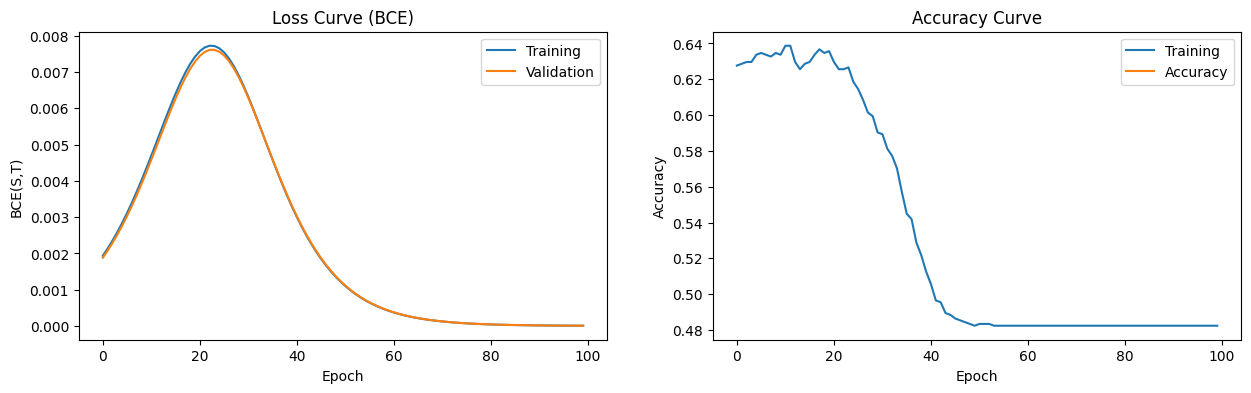

In [11]:
DEC.train()

In [12]:
training_embeddings = DEC.get_embeddings(DEC.training_trials)

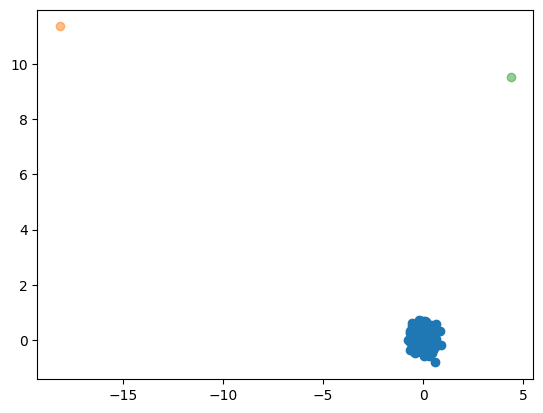

In [14]:
plt.scatter(training_embeddings[:,0],training_embeddings[:,1])
plt.scatter(DEC.cluster_centers[0][0],DEC.cluster_centers[0][1],alpha=0.5)
plt.scatter(DEC.cluster_centers[1][0],DEC.cluster_centers[1][1],alpha=0.5)

In [ ]:
DEC.cluster_centers[0]

In [15]:
from sklearn.preprocessing import StandardScaler

In [27]:
DEC.cluster_centers = StandardScaler().fit_transform(np.concatenate((DEC.cluster_centers,training_embeddings.numpy())))[0],StandardScaler().fit_transform(np.concatenate((DEC.cluster_centers,training_embeddings.numpy())))[1]

In [28]:
DEC.evaluate_training_accuracy()

0.0